# (A2.2 LDA y árboles de decisión)         
                              
                                                                            Fernando Ariel Lozano Castillo

En este proyecto usare la base de datos una base de datos de nombre 'BancoFull' del ,[UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/222/bank+marketing)

Las variables son las siguientes



| **Variable** | **Descripción** | **Tipo** |
|--------------|-----------------|----------|
| age          | Edad del cliente | Numérica |
| job          | Tipo de trabajo | Categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services" |
| marital      | Estado civil | Categórica: "married", "divorced", "single" (nota: "divorced" incluye divorciado o viudo) |
| education    | Nivel educativo | Categórica: "unknown", "secondary", "primary", "tertiary" |
| default      | ¿Tiene crédito en default? | Binaria: "yes", "no" |
| balance      | Balance promedio anual, en euros | Numérica |
| housing      | ¿Tiene préstamo de vivienda? | Binaria: "yes", "no" |
| loan         | ¿Tiene préstamo personal? | Binaria: "yes", "no" |
| contact      | Tipo de comunicación de contacto | Categórica: "unknown", "telephone", "cellular" |
| day          | Día del último contacto del mes | Numérica |
| month        | Mes del último contacto del año | Categórica: "jan", "feb", "mar", ..., "nov", "dec" |
| duration     | Duración del último contacto, en segundos | Numérica |
| campaign     | Número de contactos realizados durante esta campaña y para este cliente | Numérica |
| pdays        | Número de días que han pasado desde el último contacto con el cliente en una campaña anterior | Numérica (-1 significa que el cliente no fue contactado previamente) |
| previous     | Número de contactos realizados antes de esta campaña y para este cliente | Numérica |
| poutcome     | Resultado de la campaña de marketing anterior | Categórica: "unknown", "other", "failure", "success" |
| y            | ¿El cliente ha suscrito un depósito a plazo? | Binaria: "yes", "no" |
```
En esto Y es la variable de salida de esta base de datos.

Primero lo que haremos es usar la librería de pandas para leer el archivo y lo almacenamos en la variable `df`, después de ello con la función `shape` veré el tamaño de la base de datos.  Y con head ver como distribuyeron la información.
Recalcar en usar el parámetro sep,  en este caso **( ; )**   ,     con el respectivo separado de la base de datos para que python los interprete de la manera adecuada.

In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

# Cargar la base de datos y especificar el separador
df = pd.read_csv("BancoFull.csv", sep=";")

# Imprimir el tamaño de la base de datos
print("Tamaño de la base : ", df.shape, "\n")

# Mostrar las primeras filas del DataFrame para verificar que las columnas se han separado correctamente
display(df.head())



Tamaño de la base :  (45211, 17) 



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Ahora vemos que si esta bien organizada la información. Procedemos ahora a solución de errores.

# Solucion de errores
Lo que haremos es cambiar los valores de  `yes` y `no` por valores de 1 y 0 respectivamente. 
Y en `pdays` cambiar el valor de `-1` a 0 para que sea un no
Además de cambiar el nombre de la variable `y` a `Salida`para evitar confusiones. 

**df.loc[df['pdays'] == -1, 'pdays'] = 0**


La columna pdays representa el número de días que pasaron desde que el cliente fue contactado por última vez.
El valor -1 en esta columna indica que el cliente no fue contactado previamente.
Para facilitar el análisis, reemplazamos -1 con 0, ya que 0 es un valor más intuitivo para representar "ningún contacto previo".
loc es una función de Pandas que permite acceder a un grupo de filas y columnas por etiquetas o una condición booleana.
En este caso, seleccionamos todas las filas donde pdays == -1 y asignamos el valor 0 a la columna pdays.


**df.rename(columns={'y': 'Salida'}, inplace=True)**


La columna y es la variable objetivo (target) que indica si el cliente suscribió un depósito a plazo (yes/no).
Cambiamos su nombre a Salida para que sea más descriptivo y evitar confusiones.
**inplace=True**
Este parámetro indica que el cambio se aplicará directamente al DataFrame (df) sin necesidad de asignar el resultado a una nueva variable.



**df = pd.get_dummies(df, drop_first=True)**



Las variables categóricas (como job, marital, education, etc.) no pueden ser usadas directamente en modelos matemáticos porque no son numéricas.
pd.get_dummies() convierte estas variables categóricas en variables dummy (también llamadas one-hot encoding).
Cada categoría se convierte en una nueva columna binaria (0 o 1).
Por ejemplo, si la columna job tiene las categorías management, technician, y retired, se crearán tres columnas: job_management, job_technician, y job_retired.
**drop_first=True**
Este parámetro elimina la primera categoría de cada variable categórica para evitar la multicolinealidad (dependencia lineal entre variables).
Por ejemplo, si job tiene 3 categorías, solo se crearán 2 columnas dummy.



**df = df.astype(int)**


Después de crear las variables dummy, las columnas resultantes son de tipo bool (True/False).
Los modelos estadísticos y de machine learning requieren que los datos sean numéricos, por lo que convertimos estas columnas booleanas a enteros (1 para True y 0 para False).



In [6]:
print(df.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [7]:



# Cambiar los valores de -1 en la columna 'pdays' a 0 usando loc
df.loc[df['pdays'] == -1, 'pdays'] = 0

# Cambiar el nombre de la variable 'y' a 'Salida'
df.rename(columns={'y': 'Salida'}, inplace=True)


df['housing'] = df['housing'].replace({'yes': 1, 'no': 0}).astype(int)
df['default'] = df['default'].replace({'yes': 1, 'no': 0}).astype(int)
df['loan'] = df['loan'].replace({'yes': 1, 'no': 0}).astype(int)
df['Salida'] = df['Salida'].replace({'yes': 1, 'no': 0}).astype(int)




df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'], drop_first=True)
# Convertir valores True/False a 0/1
df = df.replace({True: 1, False: 0})


# Mostrar las primeras filas
print(df.head())


   age  default  balance  housing  loan  day  duration  campaign  pdays  \
0   58        0     2143        1     0    5       261         1      0   
1   44        0       29        1     0    5       151         1      0   
2   33        0        2        1     1    5        76         1      0   
3   47        0     1506        1     0    5        92         1      0   
4   33        0        1        0     0    5       198         1      0   

   previous  ...  month_jul  month_jun  month_mar  month_may  month_nov  \
0         0  ...          0          0          0          1          0   
1         0  ...          0          0          0          1          0   
2         0  ...          0          0          0          1          0   
3         0  ...          0          0          0          1          0   
4         0  ...          0          0          0          1          0   

   month_oct  month_sep  poutcome_other  poutcome_success  poutcome_unknown  
0          0        

## Separación de datos
Ahora terminado los cambios en variables y la base
dividimos los datos en entrenamiento y prueba 70/30 respectivamente mediante `train_test_split` de la libreria de sklearn.
E imprimimos las proporciones para los datos originales,datos de entreamineto y datos de prueba.

In [11]:

# Importar función
from sklearn.model_selection import train_test_split

# Generar subconjuntos de prueba y entrenamiento para X e Y
X_train, X_test, Y_train, Y_test = train_test_split(df.drop("Salida", axis=1), df.Salida, train_size=0.7, random_state=42)

# Imprimir el tamaño de los subconjuntos
print("Tamaño del conjunto de entrenamiento (X_train):", X_train.shape)

print("Tamaño del conjunto de entrenamiento (Y_train):", Y_train.shape)

print("Tamaño del conjunto de prueba (X_test):", X_test.shape)

print("Tamaño del conjunto de prueba (Y_test):", Y_test.shape)

# Imprimir la distribución de clases en el conjunto de entrenamiento y prueba
print("\nDistribución de clases en el conjunto de entrenamiento:")
print(Y_train.value_counts(normalize=True))

print("\nDistribución de clases en el conjunto de prueba:")
print(Y_test.value_counts(normalize=True))

Tamaño del conjunto de entrenamiento (X_train): (31647, 42)
Tamaño del conjunto de entrenamiento (Y_train): (31647,)
Tamaño del conjunto de prueba (X_test): (13564, 42)
Tamaño del conjunto de prueba (Y_test): (13564,)

Distribución de clases en el conjunto de entrenamiento:
Salida
0    0.88337
1    0.11663
Name: proportion, dtype: float64

Distribución de clases en el conjunto de prueba:
Salida
0    0.882188
1    0.117812
Name: proportion, dtype: float64


Esto demuestra que has mantenido un balance de clases adecuado entre los conjuntos de entrenamiento y prueba, lo cual es importante para asegurar que el modelo no esté sesgado hacia una clase en particular.



## Regresión Logistica Simple

Ahora hacemos una regresion logistica simple con la funcion  `GLM` de statsmodel. E imprimimos el summary para cuales son las 2 variables más importantes y quedarnos solo con ellas y borrar el resto.

In [14]:
# Verificar los tipos de datos de las columnas
print(df.dtypes)

age                    int64
default                int32
balance                int64
housing                int32
loan                   int32
day                    int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
Salida                 int32
job_blue-collar        int64
job_entrepreneur       int64
job_housemaid          int64
job_management         int64
job_retired            int64
job_self-employed      int64
job_services           int64
job_student            int64
job_technician         int64
job_unemployed         int64
job_unknown            int64
marital_married        int64
marital_single         int64
education_secondary    int64
education_tertiary     int64
education_unknown      int64
contact_telephone      int64
contact_unknown        int64
month_aug              int64
month_dec              int64
month_feb              int64
month_jan              int64
month_jul              int64
month_jun     

In [15]:
import statsmodels.api as sm
import numpy as np

# Agregar una constante
X_train = sm.add_constant(X_train)

# Ajustar el modelo de regresión logística
model = sm.GLM(Y_train, X_train, family=sm.families.Binomial())
result = model.fit()



In [16]:

print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Salida   No. Observations:                31647
Model:                            GLM   Df Residuals:                    31604
Model Family:                Binomial   Df Model:                           42
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7527.4
Date:                Thu, 20 Mar 2025   Deviance:                       15055.
Time:                        09:34:31   Pearson chi2:                 1.47e+07
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2170
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.5837    

Ahora para checar que variables seran las elegidas, checare los p value y sus coeficientes

In [19]:
# Obtener p-values y coeficientes
p_values_sorted = result.pvalues.sort_values()
coef_sorted = result.params.loc[p_values_sorted.index]  # Ordenar coeficientes igual que los p-values

# Configurar para evitar notación científica y mostrar más decimales
np.set_printoptions(suppress=True, precision=10)



# Filtrar las variables más significativas (p < 0.05)
significant_vars = p_values_sorted[p_values_sorted < 0.05]
significant_coefs = coef_sorted.loc[significant_vars.index]


In [20]:

print("\nVariables más significativas (p < 0.05):")
print(significant_vars)


Variables más significativas (p < 0.05):
duration                0.000000e+00
poutcome_success       1.599662e-123
contact_unknown         8.670440e-75
housing                 5.053994e-40
const                   3.257054e-32
month_jul               5.529528e-24
month_mar               6.828665e-24
month_nov               1.353864e-19
month_jan               3.784113e-19
month_aug               3.850281e-16
campaign                1.155978e-13
month_oct               1.449242e-11
loan                    1.392622e-09
month_may               7.218009e-09
month_sep               4.100046e-08
education_tertiary      5.773798e-06
job_blue-collar         8.726699e-04
education_secondary     1.259386e-03
day                     1.438182e-03
job_technician          3.921849e-03
month_jun               5.312247e-03
month_feb               6.642627e-03
job_housemaid           8.567096e-03
month_dec               8.705338e-03
marital_married         9.465185e-03
job_services            1.517132e

In [21]:
print("\nCoeficientes de las variables más significativas:")
print(significant_coefs)


Coeficientes de las variables más significativas:
duration               0.004202
poutcome_success       2.328443
contact_unknown       -1.620794
housing               -0.696131
const                 -2.583671
month_jul             -0.929040
month_mar              1.437183
month_nov             -0.901391
month_jan             -1.295753
month_aug             -0.759248
campaign              -0.090091
month_oct              0.855445
loan                  -0.435433
month_may             -0.496000
month_sep              0.787038
education_tertiary     0.410198
job_blue-collar       -0.286893
education_secondary    0.249894
day                    0.009561
job_technician        -0.238694
month_jun              0.313629
month_feb             -0.292715
job_housemaid         -0.423442
month_dec              0.540275
marital_married       -0.183603
job_services          -0.244472
job_student            0.305855
poutcome_other         0.229921
job_entrepreneur      -0.324351
job_self-employed    

Por lo visto las variables que serán las elegidas son `duration` y `poutcome_success ` por su bajísimo p value y respectivo coeficiente.

# LDA
Ahora vayamos a hacer LDA con las variables que encontramos como las importantes


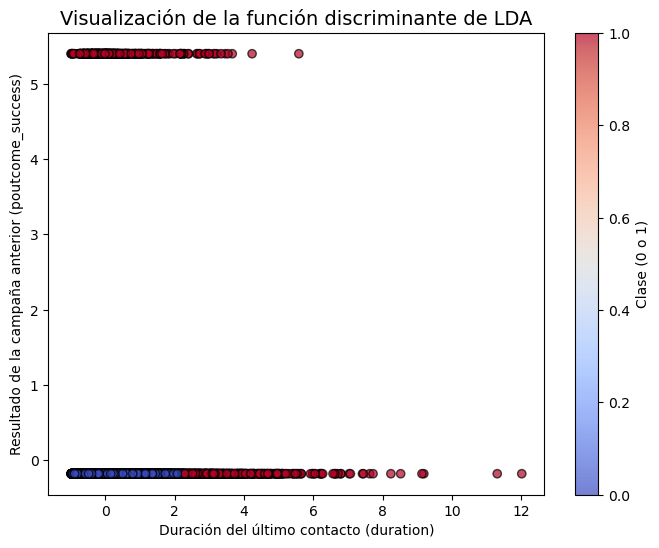

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Seleccionamos las dos variables más significativas: 'duration' y 'poutcome_success'
X = df[['duration', 'poutcome_success']]
y = df['Salida']

# Dividir los datos en conjunto de entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Escalado de las características
scaler = StandardScaler()

# Ajustar el scaler en el conjunto de entrenamiento y transformar X_train
X_train = scaler.fit_transform(X_train)

# Transformar X_test usando el scaler ajustado en X_train
X_test = scaler.transform(X_test)

# Crear el modelo LDA
lda = LDA()

# Ajustar el modelo LDA con los datos de entrenamiento
lda.fit(X_train, y_train)

# Obtener las predicciones (para visualización)
y_pred = lda.predict(X_test)

# Visualizar la función discriminante (usamos la predicción para distinguir por color)
plt.figure(figsize=(8,6))

# Diferenciar las observaciones según la clase
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', marker='o', edgecolor='k', alpha=0.7)

# Añadir título y etiquetas
plt.title('Visualización de la función discriminante de LDA', fontsize=14)
plt.xlabel('Duración del último contacto (duration)')
plt.ylabel('Resultado de la campaña anterior (poutcome_success)')

# Mostrar la leyenda (las clases 0 y 1)
plt.colorbar(label='Clase (0 o 1)')

# Mostrar el gráfico
plt.show()

## Datos de LDA
Ahora que ya hicimos ambos métodos ,toca sacar las métricas vistas en clase en los datos de prueba. Comenzando con LDA. Calculamos la matriz de confusion de dos maneras diferentes pero llegamos al mismo resultado.

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de confusión:')
print(conf_matrix)

# Reporte de clasificación
print('Reporte de clasificación:')
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.90
Matriz de confusión:
[[11568   398]
 [  997   601]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11966
           1       0.60      0.38      0.46      1598

    accuracy                           0.90     13564
   macro avg       0.76      0.67      0.70     13564
weighted avg       0.88      0.90      0.89     13564



Precisión del modelo: 0.90
Matriz de confusión:
[[11568   398]
 [  997   601]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11966
           1       0.60      0.38      0.46      1598

    accuracy                           0.90     13564
   macro avg       0.76      0.67      0.70     13564
weighted avg       0.88      0.90      0.89     13564

Exactitud: 0.8972, Sensibilidad: 0.3761, Especificidad: 0.9667


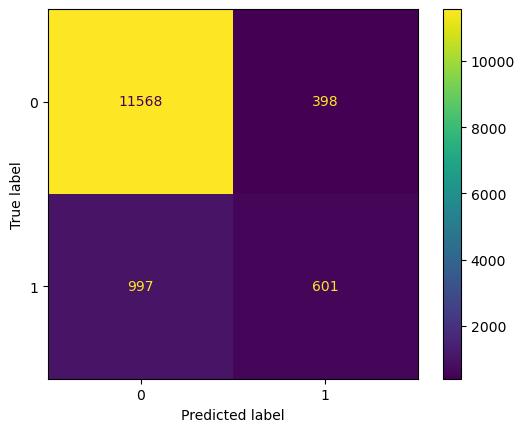

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
# Generar las probabilidades para el conjunto de prueba
pred_prob = lda.predict_proba(X_test)[:, 1]  # Probabilidades para la clase 1

# Definir el umbral
umbral = 0.5

# Hacer predicciones con el umbral 0.5
y_pred = (pred_prob >= umbral).astype(int)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=lda.classes_).plot(xticks_rotation="horizontal")
print('Matriz de confusión:')
print(conf_matrix)

# Reporte de clasificación
print('Reporte de clasificación:')
print(classification_report(y_test, y_pred))

# Función para calcular métricas de la matriz de confusión
def calcular_metricas(cm):
    TP = cm[1, 1]  # Verdaderos Positivos
    TN = cm[0, 0]  # Verdaderos Negativos
    FP = cm[0, 1]  # Falsos Positivos
    FN = cm[1, 0]  # Falsos Negativos

    # Exactitud
    exactitud = (TP + TN) / (TP + TN + FP + FN)
    
    # Sensibilidad (Recall)
    sensibilidad = TP / (TP + FN)
    
    # Especificidad
    especificidad = TN / (TN + FP)

    return exactitud, sensibilidad, especificidad

# Calcular y mostrar las métricas adicionales
exactitud, sensibilidad, especificidad = calcular_metricas(conf_matrix)
print(f"Exactitud: {exactitud:.4f}, Sensibilidad: {sensibilidad:.4f}, Especificidad: {especificidad:.4f}")

# Arbol de decisiones
Ahora realizamos una primera instancia del árbol
**DATO IMPORTANTE**  Se tuvo que limitar la grafica del arbol debido a que sin ello, el arbol tendrá más de 30 capas y apenas y se logra ver todo.


In [30]:
# Seleccionamos las dos variables más significativas: 'duration' y 'poutcome_success'
X = df[['duration', 'poutcome_success']]
y = df['Salida']

# Separar los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
# Imprimir las proporciones
print(df.Salida.value_counts())
print(y_train.value_counts())
print(y_test.value_counts())




Salida
0    39922
1     5289
Name: count, dtype: int64
Salida
0    27945
1     3702
Name: count, dtype: int64
Salida
0    11977
1     1587
Name: count, dtype: int64


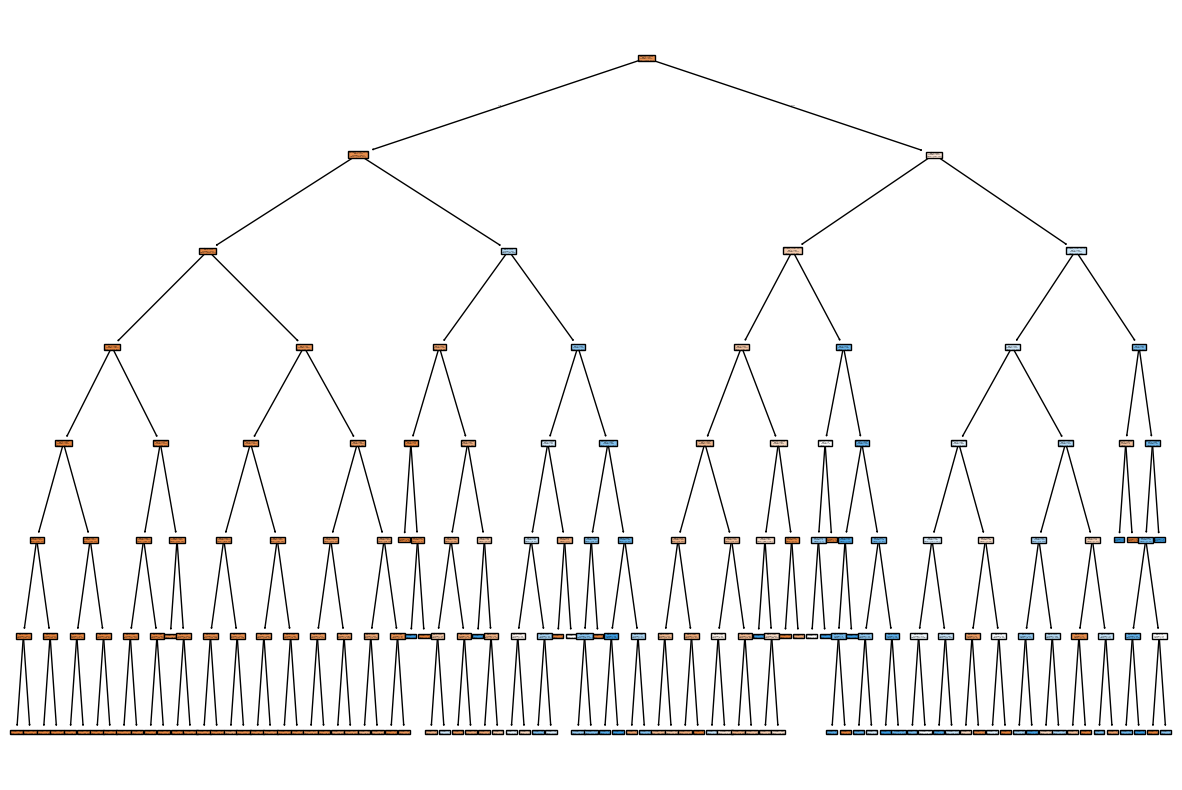

In [31]:
# Importar librería
from sklearn.tree import DecisionTreeClassifier as DTC
# Crear y entrenar modelo
# Crear y entrenar modelo con profundidad máxima limitada
tree = DTC(max_depth=7).fit(X_train, y_train)  # Limita la profundidad a 3 niveles

# Función mágica
%matplotlib inline
# Importa plot_tree
from sklearn.tree import plot_tree
# Define el tamaño de la figura
plt.figure(figsize=(15,10))
# Genera la gráfica del árbol de decisión
plot_tree(tree, filled=True, feature_names=X_train.columns);
plt.show()

In [32]:
# Importa las métricas
from sklearn.metrics import accuracy_score, f1_score
# Realiza la predicción
yhat0 = tree.predict(X_test)
# Calcula accuracy
acc0 = accuracy_score(y_test, yhat0)
# Calcula f1
f10 = f1_score(y_test, yhat0)
# Imprime resultados
print("Accuracy inicial:",acc0)
print("F1-score inicial:",f10)

Accuracy inicial: 0.9023886759068122
F1-score inicial: 0.4648342764753436


Vamos a podar el árbol de decisión determinando el valor óptimo de 
𝛼
α mediante validación cruzada con 4 folds.

Importamos numpy y las funciones cross_val_score y StratifiedKFold de sklearn.model_selection.
Usamos StratifiedKFold(n_splits=4) para asegurar una separación estratificada en los folds.
Creamos un vector de posibles valores de 
𝛼
α con numpy.linspace(0.001, 0.2, N), donde 
𝑁
N está entre 100 y 250.
Inicializamos un vector para almacenar los resultados de cada fold.

In [34]:
# Importar numpy
import numpy as np
# Importar funciones de validación cruzada
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Generar objeto de validación cruzada
skf = StratifiedKFold(n_splits=4)
# Generar secuencia de valores
ccp = np.linspace(0.001, 0.2, 250)
# Inicializar variable de salida
cv_scores = []
# Ciclo donde se calcula el f1-score mediante validación cruzada
for alpha in ccp:
  pruned_tree = DTC(ccp_alpha=alpha)
  cv_scores.append(np.mean(cross_val_score(pruned_tree, X_train, y_train, cv=skf, scoring='f1')))

Revisemos ahora qué valor de alpha es óptimo para este sistema.  usando la función `argmax` de numpy en el vector de resultados, y ubicar dentro del vector de posibles $\alpha$ el valor que corresponde a dicha posición.

In [37]:
# Encontrar el alpha óptimo
alpha = ccp[np.argmax(cv_scores)]
# Imprimir resultados
print("Best alpha:",alpha)

Best alpha: 0.001


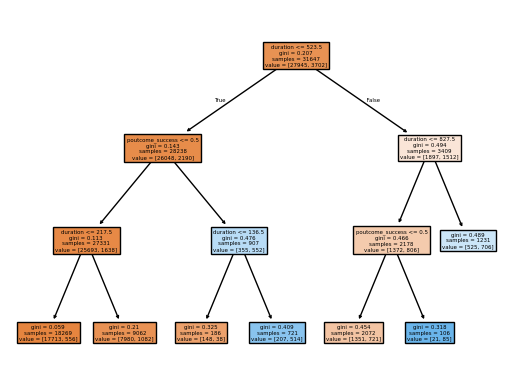

In [39]:
# Generar y entrenar el árbol podado
pruned_tree = DTC(ccp_alpha=alpha).fit(X_train, y_train)

# Visualizar árbol

plot_tree(pruned_tree, filled=True, feature_names=X_train.columns)
plt.show()  # Asegurar que el gráfico se muestre correctamente

In [40]:
# Predicciones del nuevo modelo
yhat_p = pruned_tree.predict(X_test)
# Accuracy
acc_p = accuracy_score(y_test, yhat_p)
# F-1 score
f1_p = f1_score(y_test, yhat_p)
# Imprimir resultados
print("Accuracy final:",acc_p)
print("F1-score final:",f1_p)

Accuracy final: 0.9031259215570628
F1-score final: 0.4727126805778491


# Conclusiones
Se tuvo que poner la informacion de la matriz de confusion del LDA antes del arbol, y no como se dice en las indicaciones debido a que se generaba problemas con los plots de las matrices.


### LDA
El LDA, muestra que es bueno para predecir clase 0 mucho más que la clase 1, visto en sus puntuaciones de precision y una gran diferencia en recall para detectar los casos reales de cada clase. Sin embargo, esto puede ser debido a un desbalance que existe en la cantidad de casos. Porque de clase 0 son `11966 casos` y de clase 1 son `1598 casos` por lo que es más frecuente la clase 0 y hay un rendimiento deficiente de la clase 1.



### Arbol
Después de podar el árbol, pasó de tener una profundidad de 7 a solo 3 niveles. Esto significa que ahora es mucho más simple y fácil de entender. Lo mejor de todo es que, aunque redujimos su complejidad, el rendimiento no solo se mantuvo, sino que incluso mejoró un poco.

Antes de la poda, la precisión del modelo (accuracy) era de 0.9024 y el F1-score estaba en 0.4648. Después de la poda, la precisión subió un poquito a 0.9031, pero lo realmente interesante es que el F1-score mejoró bastante, llegando a 0.4727. Esto muestra que el modelo ahora tiene un mejor equilibrio entre precisión y recall, lo cual es  útil si las clases están desbalanceadas.


Yo creo que el mejor para esta tarea es el LDA,debido a que su accuracy y F1 son mejores que los del

Firma de honor: Doy mi palabra que he realizado esta actividad con integridada académica
Partes del codigo se realizaron con GPT y DeepSeek